# k-NN Project 3: `MNIST` Handwritten recognition

We would like to let the machine recognize handwritten digits. `MNIST` is a classical dataset that contains handwritten digits information. Now we apply kNN algrotithm to it. 

`MNIST` is a classical dataset. It can be found from many repository. We will use `sklearn.dataset.fetch_openml` to load it from [www.openml.org](https://www.openml.org/d/554).

## Dataset description
Every digit is stored as a $28\times28$ picture. This is supposed to be a $28\times28$ matrix. Every entry represents a gray value of the corresponding pixel, whose value is from 0 to 255. The label of each matrix is the digit it represents. 

In this dataset the matrix is flattened to be a vector with $784=28\times28$ entries.  

We first load it using `sklearn.dataset.fetch_openml`.

In [20]:
import tensorflow.keras as keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
# from sklearn.datasets import fetch_openml
# # Load data from https://www.openml.org/d/554
# X, y = fetch_openml("mnist_784", return_X_y=True)

Let us play with these data first. 

In [22]:
# print(type(X))
# print(X.shape)

From these information we can see that X contains 70000 digits, each is represented by a vector with $784$ entries. Let us load one and reshape it to be a $28\times28$ matrix. Then we use `matplotlib.pyplot.imshow` to display the image.

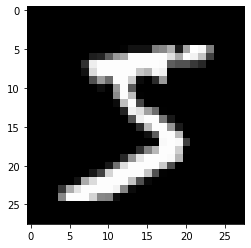

In [23]:
digit = X_train[0]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap='gray')

This image seems to be a `5`. We could double check our guess by looking at the label.

In [24]:
y_train[0]

5

It is really a `'5'`. Note that the above output is a `str`. For the purpose of calculating accuracy easily it is better to change it to be `int`.  We will also split the dataset into training set and test set and normlize them at the moment.

In [25]:
from sklearn.model_selection import train_test_split
from assests.codes.knn import encodeNorm

# Convert y to be an array of int.
# y = y.astype(int)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)


## Apply k-NN
Like the previous two examples, we now try to apply the k-NN algorithm to classify these handwritten digits. This time our codes and `sklearn` are more different. The main issue is that our codes don't have any optimizations and the runtime is super slow. `MNIST` is a bigger dataset comparing to the previous two, so it takes a long time to run our codes.

Although we won't improve our codes to make it faster at the current stage, we will modify it a little bit to make the wait feels better.

`tqdm` is package to show progress bar. Every time if you want to use a `for` loop to go through something `X`, you may wrap `tqdm` around `X` and this can show the progress of the loop and how much estimated time left. 

To make the sample faster, we will only run the code over the first 20 examples. 


In [28]:
from assests.codes.knn import classify_kNN
# import tqdm.
from tqdm import tqdm
import numpy as np

n_neighbors = 10
N_sample = 20
X_test_sample = X_test_norm[0:N_sample]
y_test_sample = y_test[0:N_sample]
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in tqdm(X_test_sample)])

cor = [data for data in y_test_sample-y_pred if data==0]
acc = len(cor) / len(y_test_sample)
print(acc)

100%|██████████| 20/20 [00:06<00:00,  3.16it/s]

1.0


For these 20 samples, our predict accuracy is $100\%$. 

Now let us try to apply `sklearn` package.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform',
                           metric='euclidean', algorithm='brute')
clf.fit(X_train_norm, y_train)
y_pred_sk = clf.predict(X_test_norm)

cor = [data for data in y_test-y_pred_sk if data==0]
acc = len(cor) / len(y_test)
print(acc)

0.9664


Note that this time we run the code over the whole test set. `KNeighborsClassifier` runs even faster than our codes over only 20 samples. 